<div style="border:solid green 2px; padding: 20px">
<b>Настя, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель исследования: 
         
1. Выявить определяющие успешность игры закономерности
2. Сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

Ход исследования

Данные получу из файла /datasets/games.csv.
О качестве данных пока неизвестно. Поэтому перед тем как приступить к целям исследования, понадобиться обзор данных.
Проверю данные на пропуски, ошибки и выбивающиеся значения. Затем на этапе предобработке я исправлю все ошибки в данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы для анализа данных. Затем приступлю к проведению исследовательского анализа.

Таким образом, мое исследование будет состоять из следующих этапов:
1. Обзор данных
2. Предобработка данных
3. Расчеты и добавление результатов в таблицу
4. Проведение анализа жанров игры
5. Составление портрета пользователя каждого региона
6. Проверка гипотез
7. Написание общего вывода

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

## Откройте файл с данными и изучите общую информацию.

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sb
from scipy import stats as st

In [149]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [151]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Предобработка данных

Заменим названия столбцов (приведем к нижнему регистру)

In [152]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ заменить регистр в наших данных 👍
</div>

### Преобразуем данные в нужные типы

In [153]:
data['year_of_release'] = data['year_of_release'].astype('Int16')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')

Мы изменили тип данных в стобце год релиза на целочисленный, float там не нужен.
А оценки критиков и пользователей преобразуем в числовой тип с помощью функции pd.to_numeric.
Рейтинг игр обозначен буквами, его трогать не будем. Другие данные имеют нужный тип.

### Обработка пропусков

In [154]:
#Проверим колличество пропусков в % (не покажет где меньше 1%)
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Большое количество пропусков в столбцах оценок критиков и пользователей (51 и 55%), а так же в столбце рейтинга (40%). И всего 2% год релиза. Пропуски могут быть связаны с тем, что пока еще люди не поставили отзывы на новинки, или же данные были не собраны на игры. По таблице можно увидеть, что, например, Super Mario Bros 1985 года, но при этом во всех 3х столцбах, указанных выше, есть пропуски. 
А год релиза может быть неизвестен.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Хороший способ посчитать доли пропущенных значений и визуализировать их 👍
</div>

In [155]:
data['year_of_release'].isna().sum()

269

In [156]:
 #удалим строки где пропущены значения в столбце year_of_release - всего их 269
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [157]:
data['user_score'].isna().sum()

8983

Поставим заглушки (закроем пропуски каким-то значением, совпадающим по типу с данными колонки таблицы. Заменим пропуски в столбцах critic_score и user_score на -1 чтобы они не слились с реальными оценками 0. 

In [158]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

Заменим пропуски в столбце rating на неизвестный 

In [159]:
data['rating'] = data['rating'].fillna('unknown')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

Аббревиатура 'tbd' в столбце с оценкой пользователей - скорее всего пропуски, заменим их на NaN с помощью np

In [160]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN, regex=True)

###  Cуммарные продажи во всех регионах 

In [161]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати мы можем применить метод `sum(axis=1)` к суммируемым столбцам.
    
`df[['col1', 'col2', 'col3']].sum(axis=1)`
</div>

In [162]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


##  Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: total_sales, dtype: int64

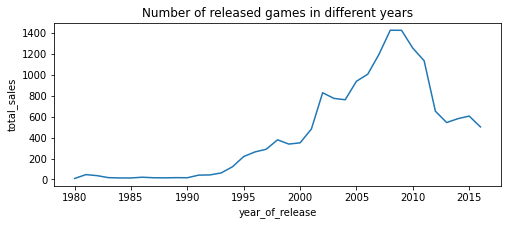

In [163]:
temp = data.groupby('year_of_release')['total_sales'].count()
plt.figure(figsize=(8, 3))
plt.ylabel('total_sales')
plt.title('Number of released games in different years')
temp.plot()
temp

По графику видно, что до 1990г выпускалось меньше всего игр (менее 100 за каждый год). От 1990г идет рост вплоть до 2008-2009 года (наибольшее количество игр именно в эти годы - 1427 и 1426). После 2009г пошло заметное снижение до 2013 года (с 1426 до 544 выпущенных игр). После 2013 небольшая коррекция верх.
Не все периоды важны, будем брать с 1990 года.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Не забывай пожалуйста подписывать каждый график.
    
Это важный момент всего проекта, так быстрее понять о чем идёт речь на графике.
    
</div>

###  Изменение продаж по платформам

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [164]:
#посмотрим какие есть платформы
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [165]:
data.groupby('platform')['total_sales'].count().sort_values(ascending=False)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: total_sales, dtype: int64

Наибольшие суммарные продажи у этих 7 платформ: PS2, DS, PS3, Wii, X360, PSP, PS  (от 1190 до 2127).
Построим распределение по годам от 2000г.

Выведем эти 7 платформ с помощью другого метода.

In [166]:
top7 = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales').\
tail(7).index.to_list()
top7

['PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

### Распределение по годам у платформ с наибольшими суммарными продажами на графиках.

PS4


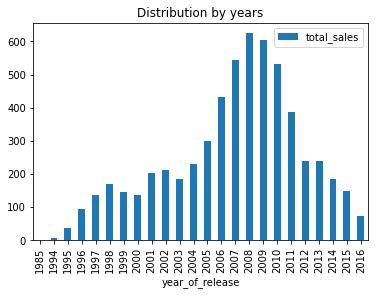

PS


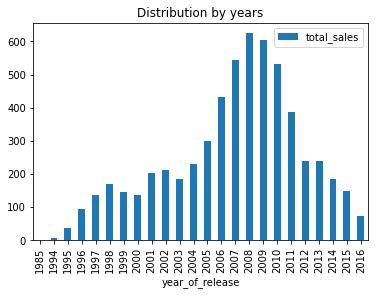

DS


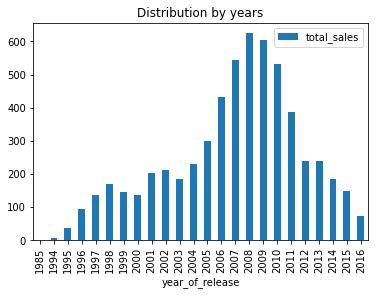

Wii


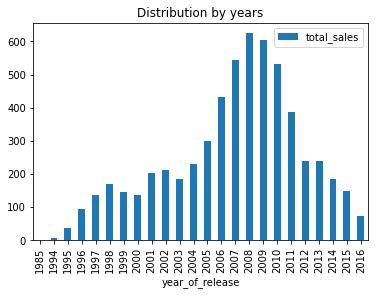

PS3


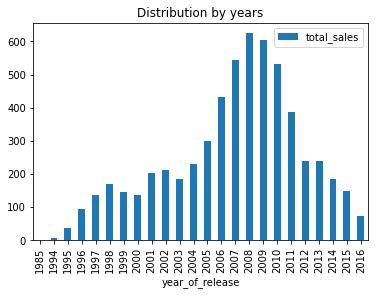

X360


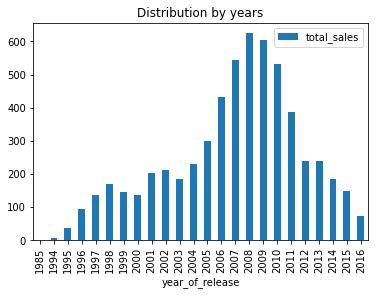

PS2


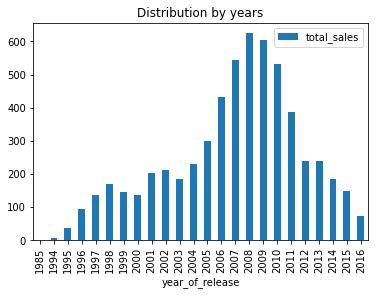

In [167]:
for platform in top7:
    print(platform)
    data.query('platform in @top7')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar')
    plt.title('Distribution by years')
    plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, что автоматизируешь построение график используя цикл `for`.
    
---
    
Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
        
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Давай подпишем каждый график в проекте, так образом сделаем еще презентабельнее нашу работу.    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Сделано)</div>

Проанализируем средний срок жизни игровой платформы. Построены столбчатые графики для семи самых популярных платформ. Оценим весь цикл жизни игровой платформы, посмотрев на продажи игр для них. Можно заметить, что средний срок жизни игровой платформы 10-12 лет.

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Пусть будет с 2013г (вышли первые игры на PS4 и хo).

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Согласен.
    
В том числе мы могли посчитать срок жизни платформы – вычесть из максимальной даты минимальную по каждой платформе и затем усреднить получившиеся значения.
    
</div>

(0.0, 2.0)

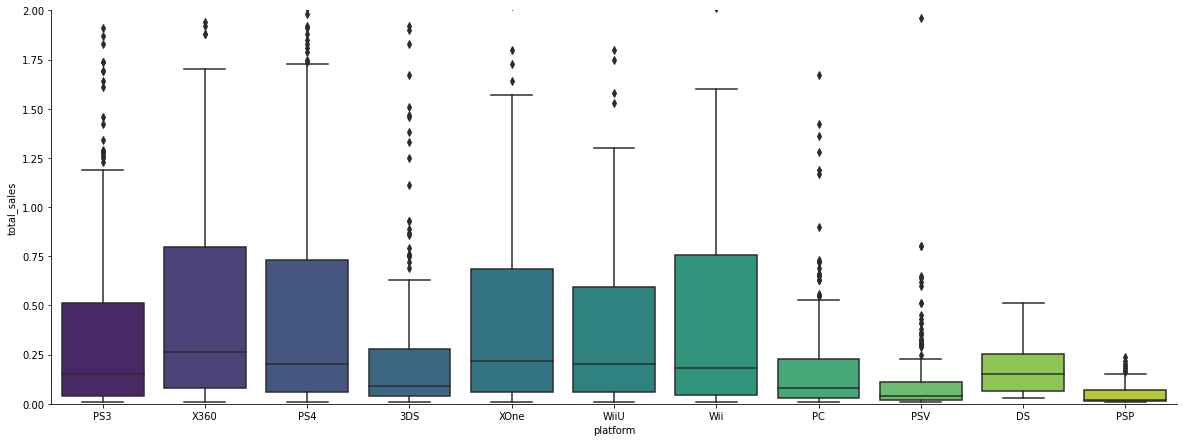

In [168]:
data_after2013 = data.query('year_of_release >= 2013')

sns.catplot(x='platform',
            y='total_sales',
            kind='box',
            data=data_after2013,
            orient='v',
            height=6,
            aspect=2.7,
            palette='viridis')
plt.ylim(0,2)

Из графика видно, что больше всех лидируют платформы 'PS4',  'Wii', 'X360', 'XOne', 'WiiU platform' и PS3 (2й и 3й квантиль ниже). Х360 и Wii - 4й квартиль выше всех. То есть ниже этого значения находится 75% всех остальных значений массива данных.

###  Графики ящиков с усами платформ из Топ7

Посмотрим на графики ящиков с усами платформ из Топ7. C помощью другой библиотеки matplotlib.pyplot и методом boxplot.

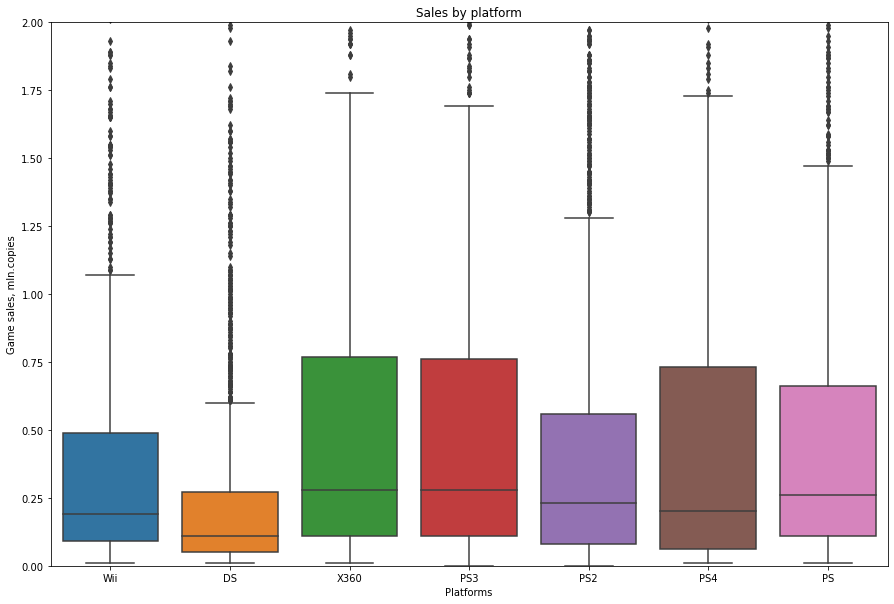

In [169]:
top7 = data.query("platform in ['PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']")

plt.figure(figsize=(15,10))
sns.boxplot(data=top7, x='platform', y='total_sales').\
    set(title='Sales by platform', xlabel='Platforms', ylabel='Game sales, mln.copies', ylim=(0,2))
plt.show()

Из графика видно, что больше всех лидируют платформы 'PS3' и 'X360'. Затем идет PS4 (второй квартиль ниже) и PS (4 квартиль ниже чем 3х предыдущих платформ). 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ визуализировать разброс данных по каждой платформе 👍
    
Кстати мы можем использовать параметр `showfliers=False`, чтобы убрать выбросы с графика.
    
</div>

###  Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [170]:
def plot_cor(data, platform):
    scores = data[['platform', 'critic_score', 'user_score', 'total_sales']].query('platform == @platform')
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle(f'Correlation between reviews and sales for the platform: {platform}')
    
    for i, score in enumerate(['user_score', 'critic_score']):
        sns.scatterplot(ax=axes[i], data=scores, x=score, y='total_sales')
    plt.show()
        
    print('Correlation between user reviews and sales:', scores['total_sales'].corr(scores['user_score']))
    print('Correlation between critic reviews and sales:', scores['total_sales'].corr(scores['critic_score']))
        

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Рад, что создаешь собственные функции для визуализации данных 👍
    
Так код становится гораздо чище в нашем проекте.
</div>

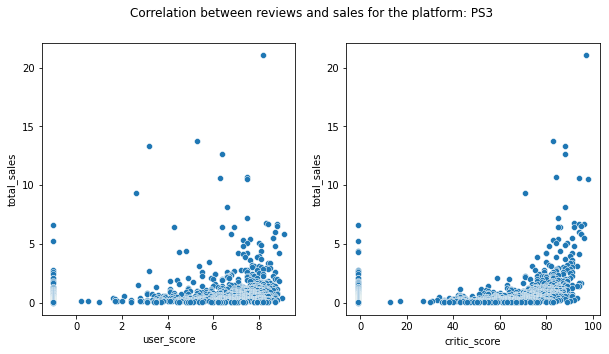

Correlation between user reviews and sales: 0.27316615242145714
Correlation between critic reviews and sales: 0.35387454219069475


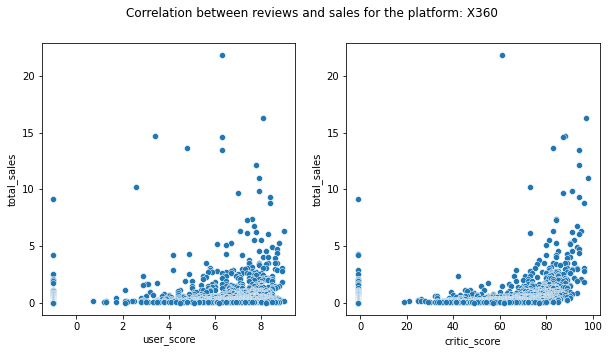

Correlation between user reviews and sales: 0.20618255079822181
Correlation between critic reviews and sales: 0.3103300870107926


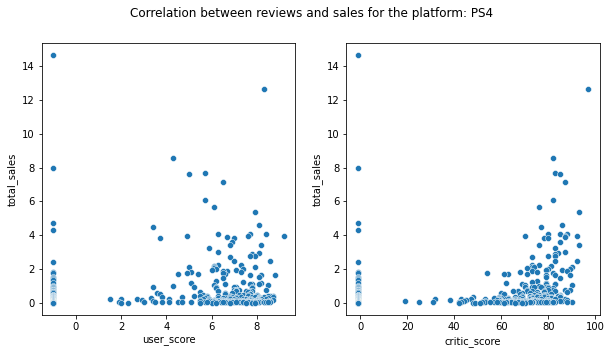

Correlation between user reviews and sales: 0.1159614931286009
Correlation between critic reviews and sales: 0.22652606614612347


In [171]:
platforms = ['PS3', 'X360', 'PS4']
for platform in platforms:
    plot_cor(data, platform)

По диаграммам рассеивания видно, что связь между оценками критиков и пользователей и продажами в целом присутствует. Особенно это видно на примере платформы X360, чем больше оценки критиков, тем больше продаж (или наоборот). На платформах PS3, PS4 связь между оценками критиков и продажами тоже выше, чем между оценками пользователей и продажами. Есть выбивающиеся значения в оценках как у пользователей, так и у критиков на -1, это пропуски, которые были заполнены в начале кода. Они могли сильно повлиять на значения корреляции. Не смотря на это из этих 3х платформ наибольшая корреляция у PS3. Correlation between user reviews and sales: 0.27
Correlation between critic reviews and sales: 0.35.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

### Соотнесем выводы с продажами игр на других платформах.

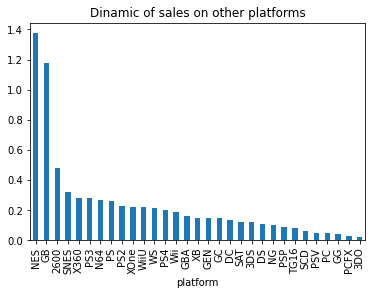

In [172]:
plot = (data.pivot_table(index='platform', values='total_sales', aggfunc='median')
       .sort_values(by='total_sales', ascending=False)
       .plot(kind='bar', legend=None, title='Dinamic of sales on other platforms'))

Посмотрим средние оценки критиков и пользователей на других более актуальных платформах (Top7), которые были выбраны ранее для анализа.

In [173]:
# удаляем значения-заглушки
df = top7[top7['user_score'] != -1]
df = df[df['critic_score'] != -1]
plot2 = (df.pivot_table(index='platform', values=['critic_score', 'user_score', 'total_sales'])
         .sort_values(by='total_sales', ascending=False))
plot2

,critic_score,total_sales,user_score
platform,,,
Wii,64.164583,1.373396,6.905833
PS,74.150327,1.372418,7.877124
PS3,70.907097,1.013471,6.788258
X360,69.080139,0.991487,6.785830
PS4,72.132530,0.981004,6.749799
PS2,69.492105,0.829833,7.664386
DS,66.531183,0.823398,7.044946


### Общее распределение игр по жанрам. 

Возьмем данные за весь период и с 2013г для сравнения.

In [174]:
data.pivot_table(index='genre', values='total_sales',\
                 aggfunc=('mean','median','sum')).round(2).sort_values(by='mean', ascending=False)

,mean,median,sum
genre,,,
Platform,0.94,0.27,825.55
Shooter,0.80,0.24,1041.36
Role-Playing,0.63,0.18,931.08
Racing,0.59,0.19,723.49
Sports,0.57,0.22,1309.67
Fighting,0.53,0.21,442.66
Action,0.52,0.19,1716.52
Misc,0.46,0.16,790.29
Simulation,0.45,0.15,387.96


<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Если код не помещается в одну строку, рекомендую переносить его на следующую подстроку если мы внутри одного метода пишем код или с помощью обратного слеша, если применяем несколько методов. Так код читается быстрее и понятнее.
    
</div>

Самые большие продажи у жанра Action (1716 sum, 0.52 - среднее, 0.19 - медиана) Sports (1309 sum, 0.57 - среднее, 0.22 - медиана) Shooter (1041 sum, 0.8 - среднее, 0.22 - медиана). Cамые маленькие продажи у жанра Strategy (172 sum).

Для анализа жангров игр, которые стабильно приносят высокий доход, рассмотрим среднее или медианное значение. Это Platform (mean = 0.94), Shooter(0.8), Role-Playint(0.63).
Наименьшее среднее у жанра Adventure (0.18)

In [175]:
data_after2013.pivot_table(index='genre', values='total_sales',\
                           aggfunc=('mean','median','sum')).round(2).sort_values(by='mean', ascending=False)

,mean,median,sum
genre,,,
Shooter,1.25,0.45,232.98
Sports,0.70,0.24,150.65
Platform,0.58,0.22,42.63
Role-Playing,0.50,0.12,145.89
Racing,0.47,0.12,39.89
Fighting,0.44,0.12,35.31
Action,0.42,0.11,321.87
Misc,0.41,0.10,62.82
Simulation,0.35,0.10,21.76


C 2013г картина немного другая. Самые большие продажи у жанров: Action (321,8), Shooter (233), Sports (150.65). Shooter и Sports поменялись местами. Cамые маленькие продажи у жанра Puzzle (3.17 sum).

Для анализа жангров игр, которые стабильно приносят высокий доход, рассмотрим среднее или медианное значение. 
Тут в лидерах Shooter (mean=1.25), Sports (0.7), Platform (0.58). 
Наименьшее среднее у жанра Adventure (0.1).


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В целом хорошо, что оцениваешь в том числе медианные и средние показатели продаж, т.к. они гораздо устойчивее к выбросам, чем просто сумма.
    
P.s. Можно было визуализировать кстати итоговую актуальную таблицу.
    
</div>

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

###  Самые популярные платформы (топ-5).

In [176]:
# Самые популярные платформы (топ-5) в Европе
eu_top_platform = data_after2013.groupby('platform')['eu_sales']\
                                .agg(['sum','mean','median']).reset_index().head(5)
eu_top_platform.sort_values(by='sum', ascending=False)

,platform,sum,mean,median
4,PS4,141.09,0.359923,0.080
3,PS3,67.81,0.196551,0.020
0,3DS,30.96,0.102178,0.000
2,PC,25.36,0.134180,0.060
1,DS,0.85,0.106250,0.095


In [177]:
# Самые популярные платформы (топ-5) в Америке
na_top_platform = data_after2013.groupby('platform')['na_sales']\
                                .agg(['sum','mean','median']).round(2).reset_index().head(5)
na_top_platform.sort_values(by='sum', ascending=False)

,platform,sum,mean,median
4,PS4,108.74,0.28,0.06
3,PS3,63.50,0.18,0.03
0,3DS,38.20,0.13,0.00
2,PC,11.11,0.06,0.00
1,DS,0.57,0.07,0.02


<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Визуализируем портреты наших пользователей</div>

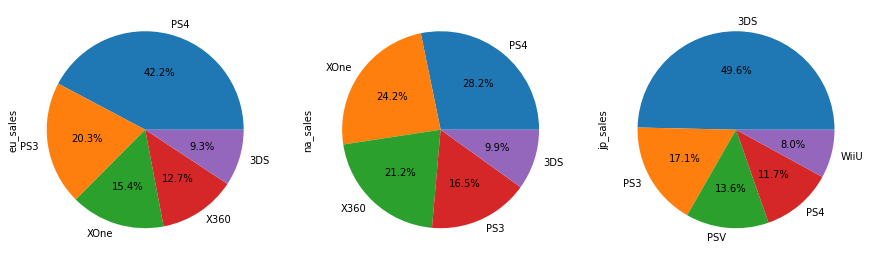

In [178]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_top_platform = data_after2013.groupby('platform').agg({region: 'sum'})\
                            .sort_values(by=region, ascending=False).reset_index().head()
        region_top_platform.plot(ax=ax[i], x='platform', y=region, kind='pie',\
                                 legend=False, autopct='%1.1f%%', labels=region_top_platform['platform'])
    plt.show()

In [179]:
# Самые популярные платформы (топ-5) в Японии
jp_top_platform = data_after2013.groupby('platform')['jp_sales']\
                                .agg(['sum','mean','median']).round(2).reset_index().head(5)
jp_top_platform.sort_values(by='sum', ascending=False)

,platform,sum,mean,median
0,3DS,67.81,0.22,0.06
3,PS3,23.35,0.07,0.03
4,PS4,15.96,0.04,0.01
1,DS,0.00,0.00,0.00
2,PC,0.00,0.00,0.00


### Самые популярные платформы в целом

In [180]:
data_after2013.groupby('platform')[['eu_sales', 'na_sales', 'jp_sales']].sum()\
.sort_values(by='eu_sales', ascending=False).style.background_gradient(cmap='Blues')

,eu_sales,na_sales,jp_sales
platform,,,
PS4,141.090000,108.740000,15.960000
PS3,67.810000,63.500000,23.350000
XOne,51.590000,93.120000,0.340000
X360,42.520000,81.660000,0.510000
3DS,30.960000,38.200000,67.810000
PC,25.360000,11.110000,0.000000
WiiU,19.850000,29.210000,10.880000
PSV,6.100000,5.040000,18.590000
Wii,5.930000,6.560000,0.050000


Самый популярные платформы в Европе и Америке - это PS4 (141 и 108млн продаж соответственно). В Японии 3DS - 67.8 млн продаж. В Европе в тройке лидеров PS3 (67.8) и XOne (51.5). В Америке это платформы: XOne (93.1) и X360 (81.6). В Японии: PS3 (23.5) и PSV (18.6). 

### Самые популярные жанры (топ-5)

In [181]:
data_after2013.groupby('genre')[['eu_sales', 'na_sales', 'jp_sales']].sum()\
.sort_values(by='eu_sales', ascending=False).style.background_gradient(cmap='Blues')

,eu_sales,na_sales,jp_sales
genre,,,
Action,118.130000,126.050000,40.490000
Shooter,87.860000,109.740000,6.610000
Sports,60.520000,65.270000,5.410000
Role-Playing,36.970000,46.400000,51.040000
Racing,20.190000,12.960000,2.300000
Misc,20.040000,27.490000,9.200000
Platform,15.580000,18.140000,4.790000
Simulation,10.920000,4.860000,4.520000
Fighting,8.550000,15.550000,7.650000


Самый популярные жанры в Европе и Америке - это Action (118.1 и 126 млн.продаж соотвественно). В Японии это жанр Role-Playing - 51 млн. 

В 5ке лидеров в Европе входят жанры: Shooter, Sports, Role-Playing, Racing.

В Америке: Shooter, Sports, Role-Playing, Misc. 

В Японии: Action, Misc, Fighting, Shooter.

###  Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [182]:
data_after2013['rating'].unique()

array(['M', 'unknown', 'E', 'T', 'E10+'], dtype=object)

In [1]:
eu_rating = data_after2013.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
na_rating = data_after2013.pivot_table(index='rating', values='na_sales', aggfunc='sum')
jp_rating = data_after2013.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

NameError: name 'data_after2013' is not defined

In [184]:
sales_world_rating = eu_rating.merge(na_rating, on='rating', how='outer')\
                              .merge(jp_rating, on='rating', how='outer')
sales_world_rating

,eu_sales,na_sales,jp_sales
rating,,,
E,83.36,79.05,15.14
E10+,42.69,54.24,5.89
M,145.32,165.21,14.11
T,41.95,49.79,20.59
unknown,78.91,89.42,85.05


Что значат эти рейтинги:
E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

По таблице видно, что больше всего продаж игр рейтингом М - для лиц старше 17 лет. Такая ситуация в Европе (продажи 145) и Америке (165), данные в Японии другие. Там у большей части игр рейтинг неизвестен (продажи 85). В Европе неизвестно, суммарно продаж 79, в Америке - 89. Самые большие продажи игр в Японии рейтингом T - для лиц старше 13 лет. Игры рейтингом E - для всех возрастных категорий, во всех 3 регионах на 2 месте (не считая игр, рейтинг которых неизвестен).

Наименьше количество продаж у игр с рейтингом T в Европе (42, рядом рейтинг Е10 - 42.7) и Америке (49.8).
В Японии у игр рейтингом Е10 (5.9).

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Давай также визуализируем портреты наших пользователей, ведь на графике информацию воспринимать гораздо проще, чем в таблице.
    
</div>

## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.

Проверка гипотез начинается с формулировки нулевой гипотезы H₀ (от англ. hypothesis — «гипотеза»). Например, «среднее генеральной совокупности равно A», где А — некоторое число.


Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. Оно может звучать так: «среднее генеральной совокупности не равно A». Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. Другой вариант H₁: «среднее генеральной совокупности больше, чем A». В этом случае альтернативная гипотеза называется односторонней, поскольку нас интересует возможное отклонение только в одну сторону.

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевая гипотеза.
* Средние пользовательские рейтинги платформ Xbox One и PC не равны - альтернативаня гипотеза

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    

    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

In [185]:
# удаляем значения-заглушки
df = data[data['user_score'] != -1] #берем все значения, т.к при проверке со срезом с 2013г значений не было
XOne = df.query('platform == "XOne"')['user_score']
PC =  df.query('platform == "PS"')['user_score']
results = st.ttest_ind(XOne, PC, equal_var = False) #для проверки гипотезы
alpha = 0.05 #значение уровня значимости

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Not rejecting the null hypothesis')

p-value 1.1253706429491469e-17
Rejecting the null hypothesis


In [186]:
print('Platform User Ratings Xbox One', df.query('platform == "XOne"')['user_score'].mean())
print('Platform User Ratings PC', df.query('platform == "PC"')['user_score'].mean())

Platform User Ratings Xbox One 6.521428571428572
Platform User Ratings PC 7.065960264900661


Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC разные.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [187]:
df = data_after2013[data_after2013['user_score'] != -1]
Action = df.query('genre == "Action"')['user_score']
Sports =  df.query('genre == "Sports"')['user_score']
results = st.ttest_ind(Action, Sports, equal_var = False) #для проверки гипотезы
alpha = 0.05 #значение уровня значимости

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Not rejecting the null hypothesis')

p-value 1.4460039700704315e-20
Rejecting the null hypothesis


In [188]:
print('Platform User Ratings Action', df.query('genre == "Action"')['user_score'].mean())
print('Platform User Ratings Sports', df.query('genre == "Sports"')['user_score'].mean())

Platform User Ratings Action 6.837532133676092
Platform User Ratings Sports 5.238124999999999


* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны - нулевая гипотеза.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. - альтернативаня гипотеза

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Гипотезы сформулированы верно.
    
</div>

Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

## Общий вывод

В нашем расположении из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Была выполнена предобработка данных, а именно: заполнены пропущенные значения, где это возможно и указаны причины, которые могли привести к пропускм в данных. Изменены типы данных, где это было необходимо.  Добавлены новые данные -  суммарные продажи во всех регионах.
Проведен исследовательский анализ данных.  До 1990г выпускалось меньше всего игр (менее 100 за каждый год). От 1990г идет рост вплоть до 2008-2009 года (наибольшее количество игр именно в эти годы - 1427 и 1426). 
Наибольшие суммарные продажи у этих 7 платформ: PS2, DS, PS3, Wii, X360, PSP, PS (от 1190 до 2127).
Cредний срок жизни игровой платформы 10-12 лет. Взяли данные за соответствующий актуальный период. Актуальный период определен самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Это период с 2013г (вышли первые игры на PS4 и хo).  Больше всех лидируют платформы 'PS4', 'Wii', 'X360', 'XOne', 'WiiU platform' и PS3 (2й и 3й квантиль ниже). Х360 и Wii - 4й квартиль выше всех.

По диаграммам рассеивания видно, что связь между оценками критиков и пользователей и продажами в целом присутствует. Особенно это видно на примере платформы X360, чем больше оценки критиков, тем больше продаж (или наоборот). 
C 2013г Самые большие продажи у жанров: Action (321,8), Shooter (233), Sports (150.65). Shooter и Sports поменялись местами. Cамые маленькие продажи у жанра Puzzle (3.17 sum).
Для анализа жангров игр, которые стабильно приносят высокий доход, рассмотрели среднее значение. Тут в лидерах Shooter (mean=1.25), Sports (0.7), Platform (0.58). Наименьшее среднее у жанра Adventure (0.1).

Самый популярные платформы в Европе и Америке - это PS4 (141 и 108млн продаж соответственно). В Японии 3DS - 67.8 млн продаж. В Европе в тройке лидеров PS3 (67.8) и XOne (51.5). В Америке это платформы: XOne (93.1) и X360 (81.6). В Японии: PS3 (23.5) и PSV (18.6).
Самый популярные жанры в Европе и Америке - это Action (118.1 и 126 млн.продаж соотвественно). В Японии это жанр Role-Playing - 51 млн.
Больше всего продаж игр рейтингом М - для лиц старше 17 лет. Такая ситуация в Европе (продажи 145) и Америке (165), данные в Японии другие. Там у большей части игр рейтинг неизвестен (продажи 85).
Рассмотрены и отвергнуты 2 гипотезы: 
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet     
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Рад, что в целом все понятно и особенно здорово, что применяешь сразу новые знания на практике, ведь так они гораздо быстрее запомнятся. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>